analisi dati millikan

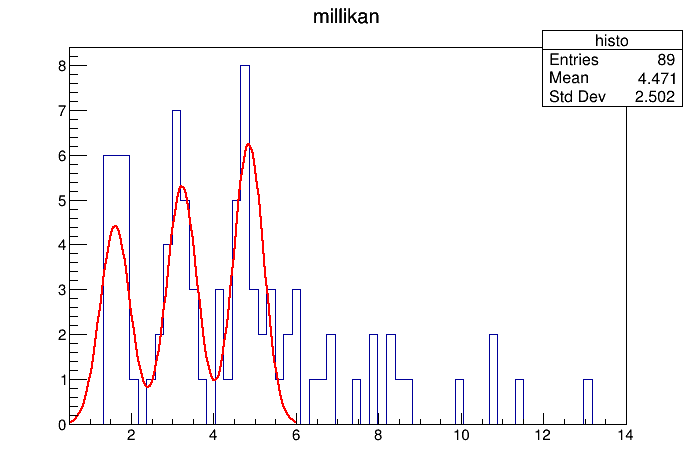

 FCN=15.4386 FROM MIGRAD    STATUS=CONVERGED     283 CALLS         284 TOTAL
                     EDM=3.90564e-07    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.61796e+00   2.22835e-02   6.08394e-05  -2.07782e-02
   2  p1           3.63961e-01   3.37035e-02   7.34927e-05  -1.13972e-02
   3  p2           4.41766e+00   1.08422e+00   2.79135e-03  -1.73199e-04
   4  p3           5.29987e+00   1.21755e+00   3.08540e-03  -4.00994e-05
   5  p4           6.23331e+00   1.34992e+00   3.31762e-03   3.17060e-05
                               ERR DEF= 0.5


Warning in <TROOT::Append>: Replacing existing TH1: histo (Potential memory leak).


In [29]:
ifstream file("milikan.dat");

auto histo = new TH1D("histo","millikan",65,0.,0.);
auto c = new TCanvas();

double k = 0;
while(file >> k){
    histo->Fill(k);
}

c->Draw();
c->cd();
histo->Draw();

 
auto f = new TF1("f","[2]*TMath::Gaus(x,[0],[1]) + [3]*TMath::Gaus(x,2*[0],[1]) + [4]*TMath::Gaus(x,3*[0],[1])",0.,6);
f->SetParameter(0,1.602);
//f->SetParLimits(0,1.59,1.6025);
f->SetParameter(1,0.2);
f->SetParameter(2,0.4);
f->SetParameter(3,0.4);
f->SetParameter(4,0.4);
histo->Fit("f","LR");
//histo->Fit("gaus","","",0.,6.2);


In [24]:
using namespace std;
double po=f->GetParameter(0);
double epo=f->GetParError(0);
double e = 1.602;
double a=0;
if(abs(e-po) < 3*epo){
    a=1;    
}
a


(double) 1.0000000
